# Data Visualization Using `plotnine`

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [3]:
pip install palmerpenguins

  Obtaining dependency information for palmerpenguins from https://files.pythonhosted.org/packages/23/78/d81191d1faf9c41e8707eb0c08dc6d489157bfa42faad62e0ab90c37ebbc/palmerpenguins-0.1.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for palmerpenguins from https://files.pythonhosted.org/packages/23/78/d81191d1faf9c41e8707eb0c08dc6d489157bfa42faad62e0ab90c37ebbc/palmerpenguins-0.1.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install 

In [5]:
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import ggplot, geom_point, aes, geom_boxplot

In [6]:
import statsmodels.api as sm
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [7]:
df

Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Davis\anaconda3\Lib\site-packages\IPython\core\formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Davis\anaconda3\Lib\site-packages\IPython\core\formatters.py", line 344, in __call__
    return method()
           ^^^^^^^^
  File "C:\Users\Davis\anaconda3\Lib\site-packages\pandas\core\frame.py", line 1106, in _repr_html_
  File "C:\Users\Davis\anaconda3\Lib\site-packages\pandas\io\formats\format.py", line 1110, in to_html
    When formatting an Index subclass
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Davis\anaconda3\Lib\site-packages\pandas\io\formats\html.py", line 88, in to_string
    lines = self.render()
            ^^^^^^^^^^^^^
  File "C:\Users\Davis\anaconda3\Lib\site-packages\pandas\io\formats\html.py", line 644, in render
    super().render()
  File "C:\Users\Davis\anaconda3\Lib\site-packages\pandas\io\formats\html.py", lin

                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
rownames                                                                          
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3     1
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3     4
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4     2
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4     2
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4     4
Merc

The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [8]:
df["am"] = df["am"].astype(str)

# Convert the other variables below

In [10]:
df["vs"] = df["vs"].astype(str)
df["gear"]= df["gear"].astype(str)
df["cyl"] = df["cyl"].astype(str)
df["carb"] = df["carb"].astype(str)

If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

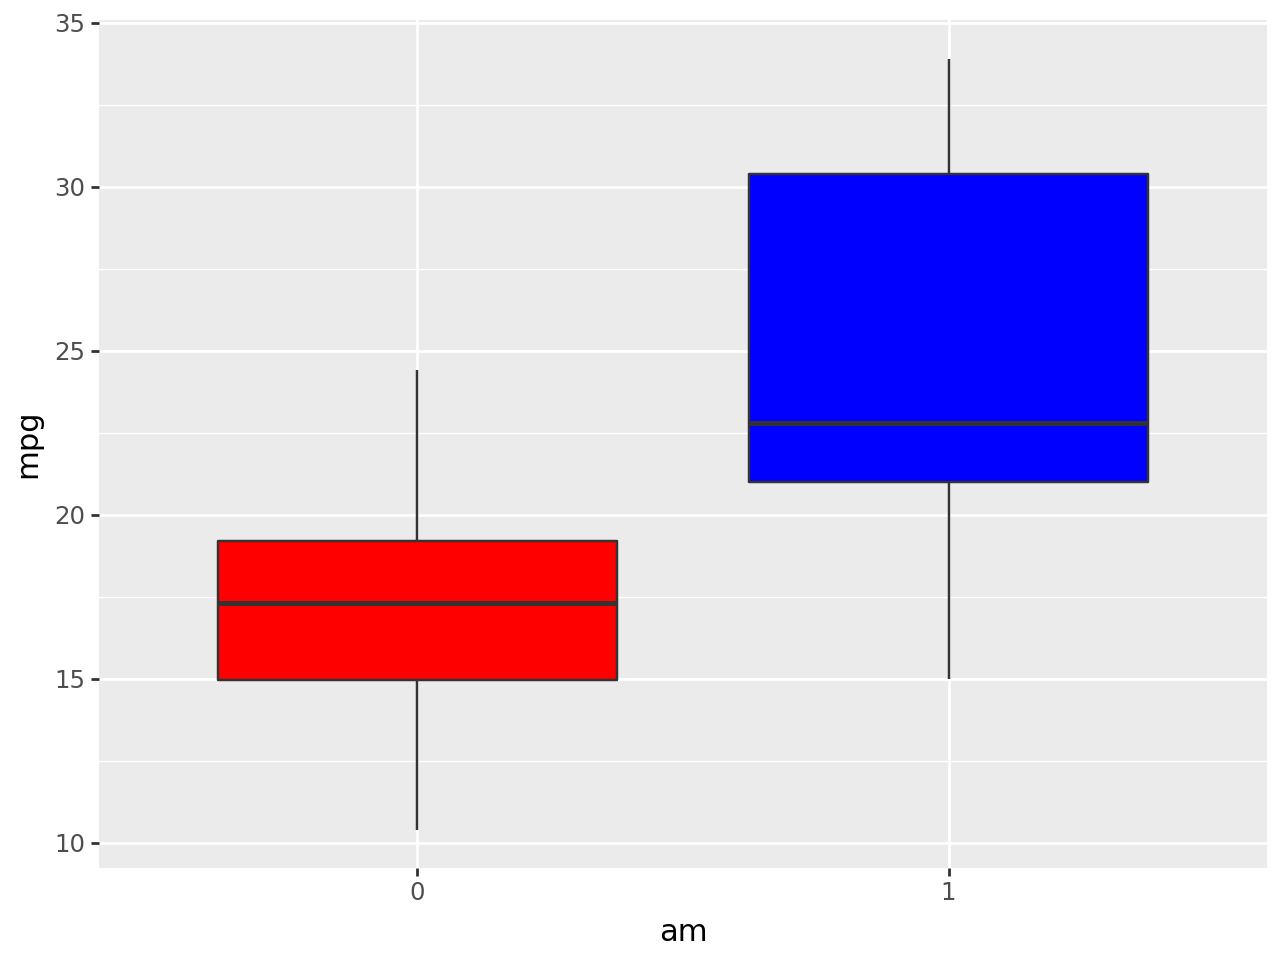

In [23]:
# Create plot for (1) here

(ggplot(df, aes(x = "am", y = "mpg")) + geom_boxplot(fill= ("red", "blue")))




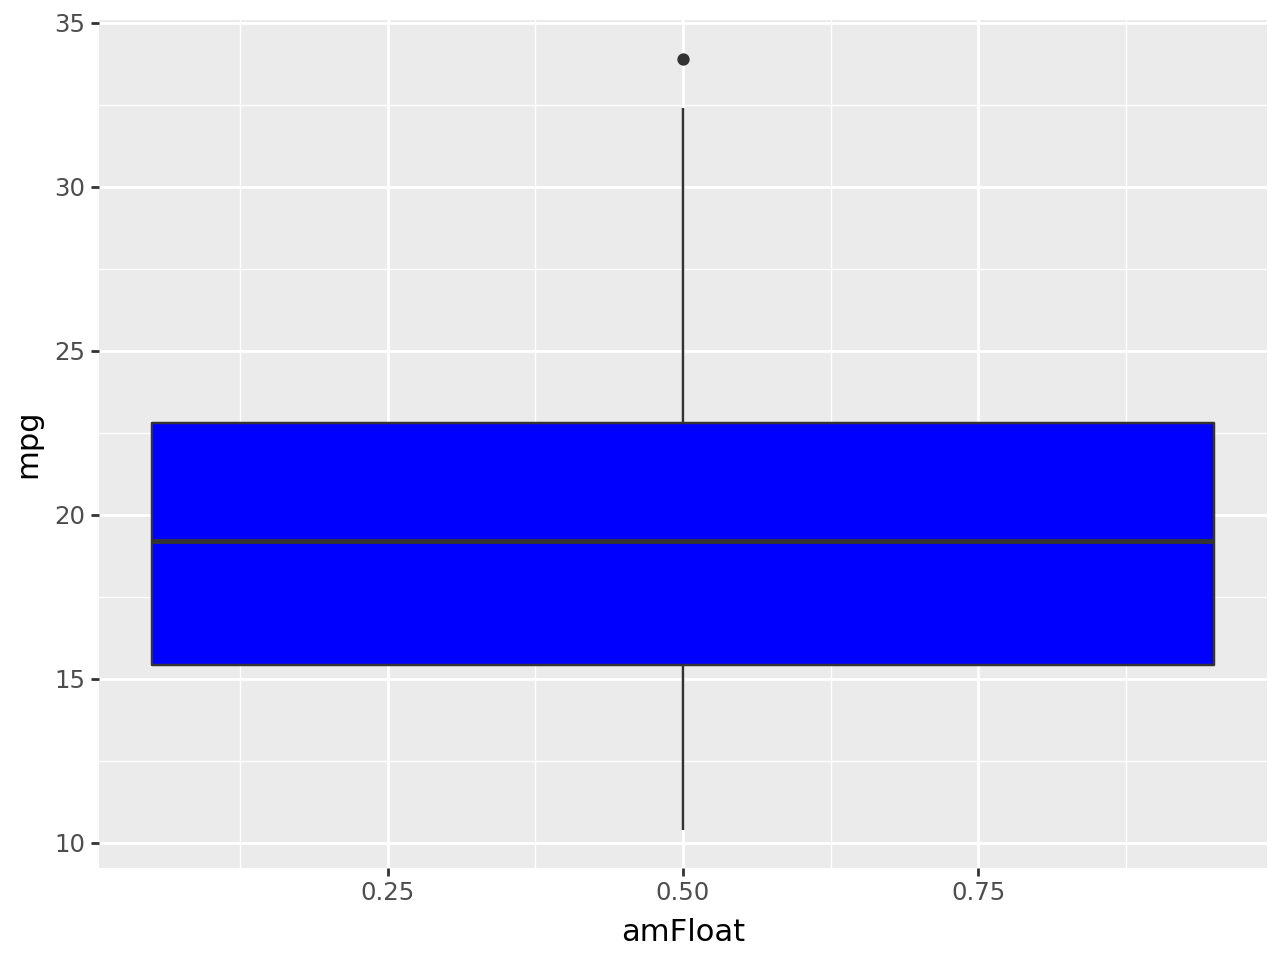

In [19]:
#convert back to float
df["amFloat"]= df["am"].astype(float)
(ggplot(df, aes(x = "amFloat", y = "mpg")) + geom_boxplot(fill = "blue"))

The first plot shows two separate boxes that include the mpg range for automatic vs. manual cars, the second plot treats the categories as a continuous variable so it really just includes the distribution of MPG for all cars

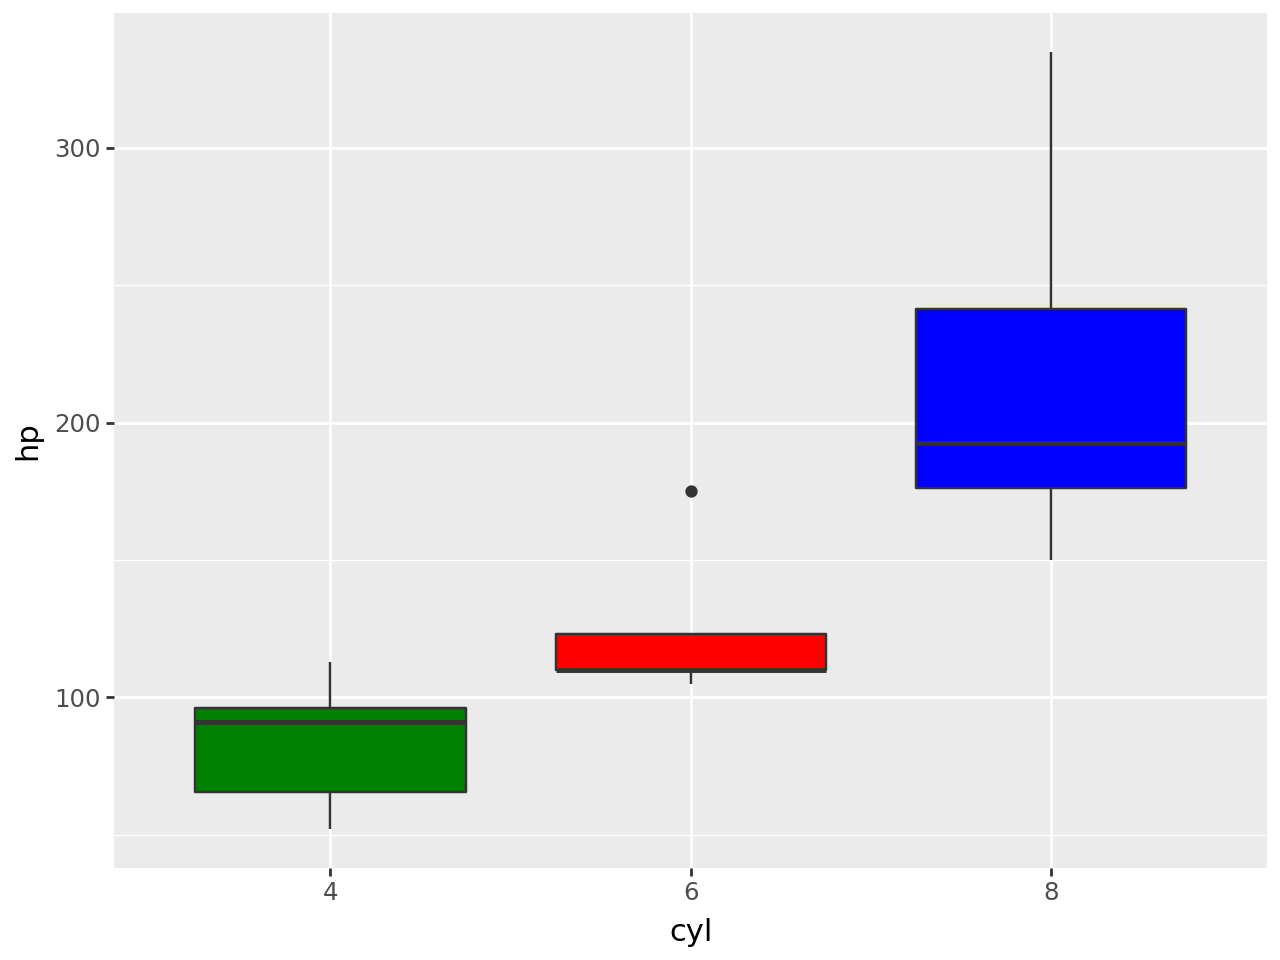

In [24]:
# Create plot for (2) here

(ggplot(df, aes(x = "cyl", y = "hp")) + geom_boxplot(fill = ("green", "red", "blue")))

converting the cylinder variable back into float


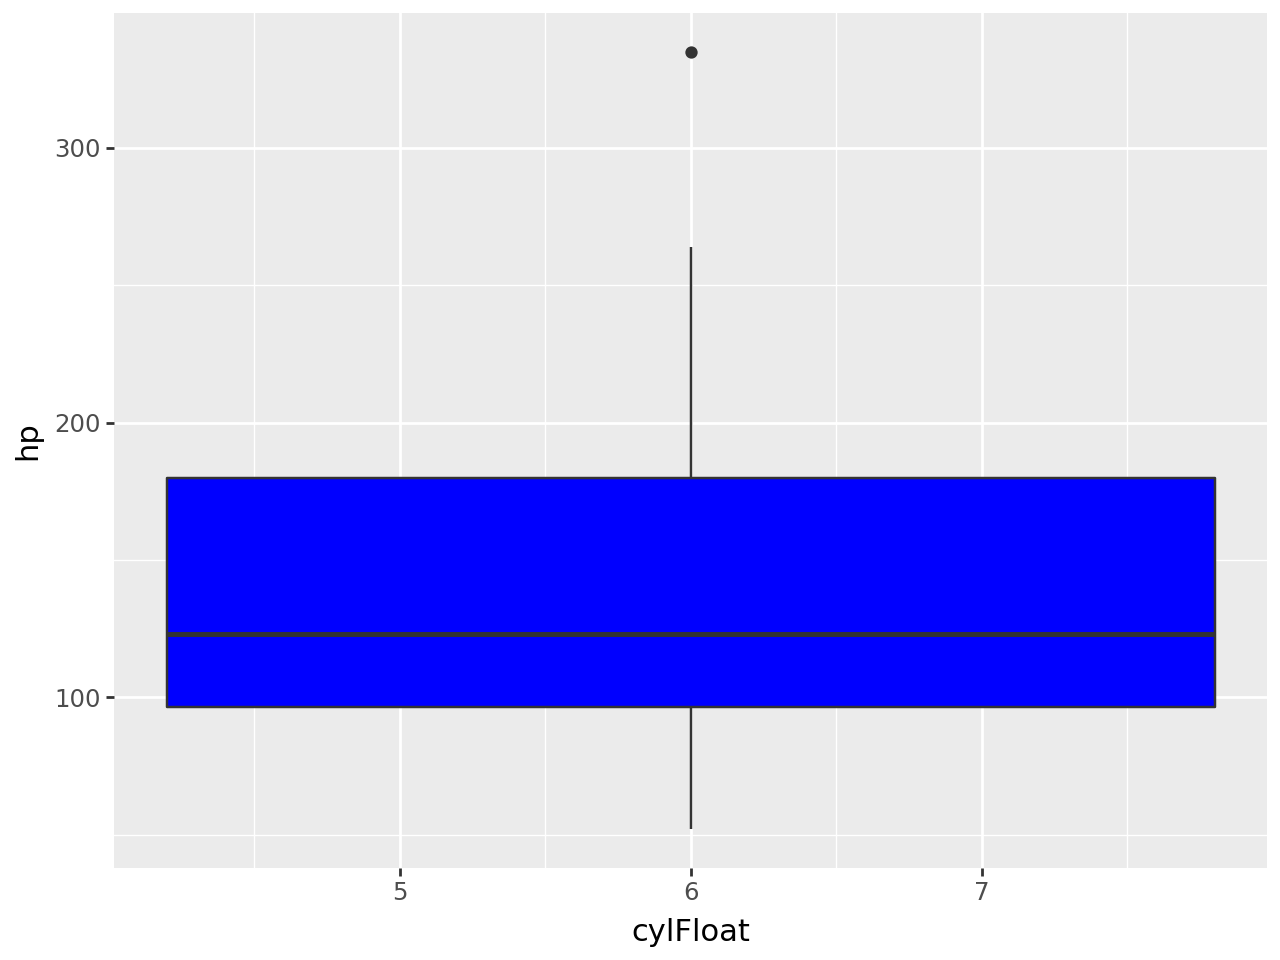

In [28]:
df["cylFloat"] = df["cyl"].astype(float)
(ggplot(df, aes(x = "cylFloat", y = "hp")) +geom_boxplot(fill=("blue")))

in a similar way as before this plot just shows the distribution of horsepower for all cylinders


Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

C:\Users\Davis\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


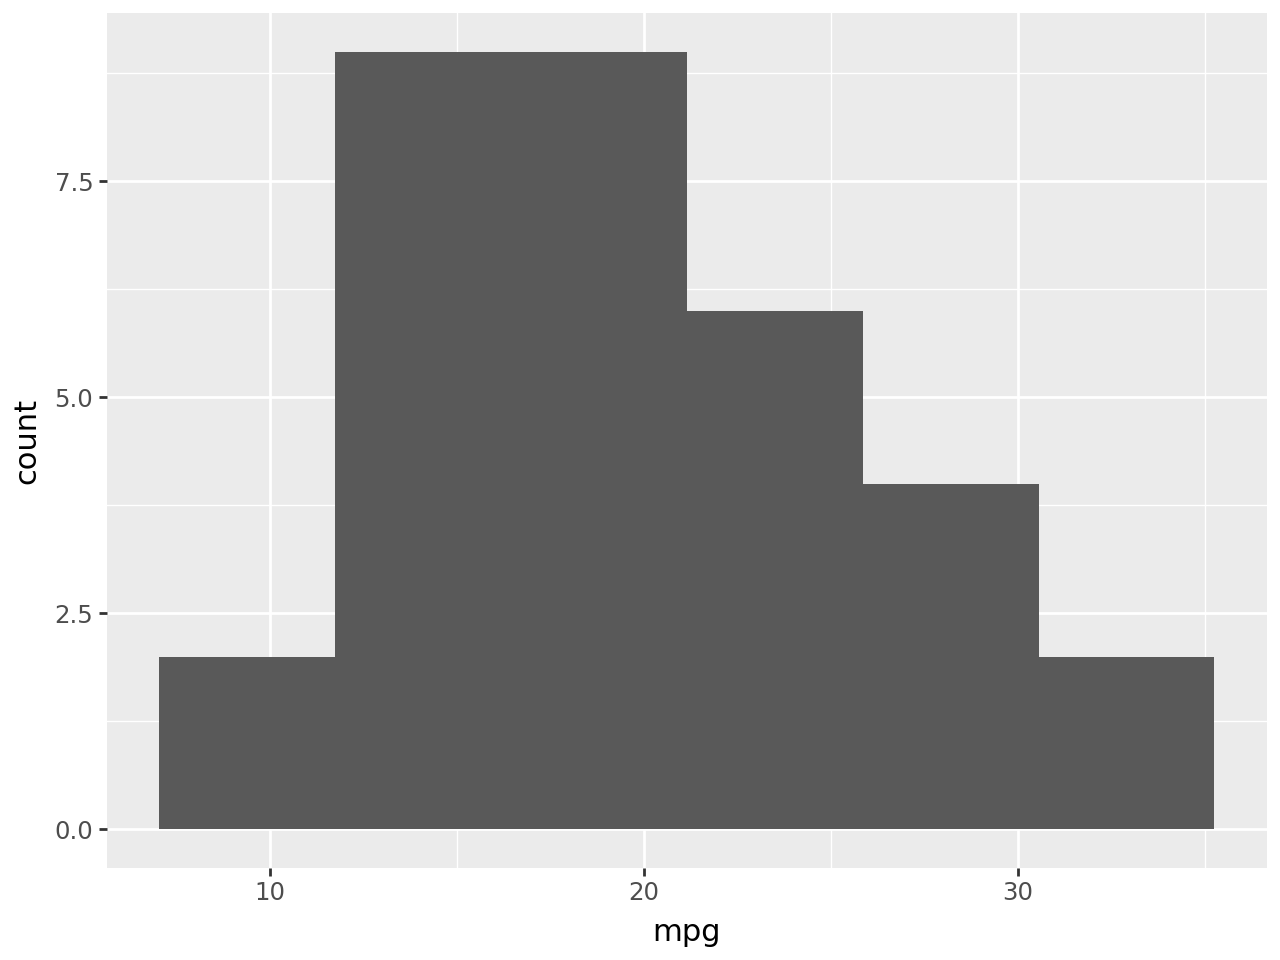

In [32]:
# Create plot with first new geometry here
from plotnine import geom_histogram
(ggplot(df, aes(x = "mpg")) +geom_histogram())

this graph shows the distribution of miles per gallon

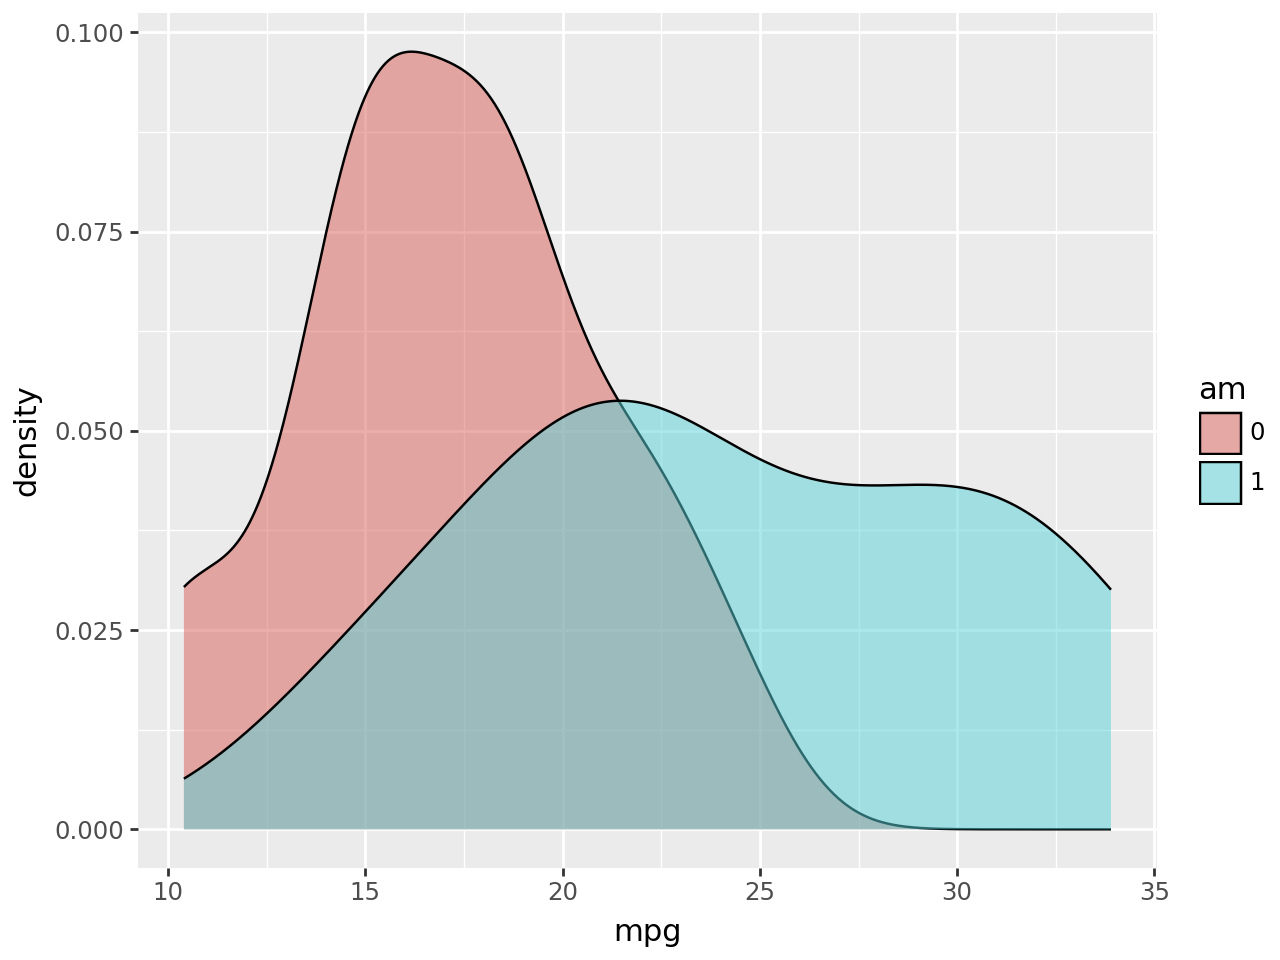

In [36]:
# Create plot with second new geometry here
from plotnine import geom_density
(ggplot(df, aes(x = "mpg", fill = "am")) + geom_density(alpha = 0.5))

this plot shows the distribution of miles per gallon but in a density rather than a histogram and separated by groups of automatic vs. manual. To me this shows that most manual cars are concentrated at a relatively lower mpg while automatic can have a higher range and typically better mpg.

In [ ]:
# Create plot with third new geometry here

(ggplot(df, aes(x = "hp", ))